In [1]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
GV = pd.read_csv('Cleaned_data.csv')

In [3]:
DD = pd.read_csv('health-data.csv')

**Gun Violence Dataset Pre-processing**

In [4]:
GV['n_victims'] = GV['n_killed'] + GV['n_injured']

In [5]:
GV_2014 = GV[GV['Year'] == 2014]
GV_2014_agg = GV_2014.groupby('state')['n_victims'].sum().reset_index()

In [6]:
GV_2015 = GV[GV['Year'] == 2015]
GV_2015_agg = GV_2015.groupby('state')['n_victims'].sum().reset_index()

In [7]:
GV_2016 = GV[GV['Year'] == 2016]
GV_2016_agg = GV_2016.groupby('state')['n_victims'].sum().reset_index()

In [8]:
GV_2017 = GV[GV['Year'] == 2017]
GV_2017_agg = GV_2017.groupby('state')['n_victims'].sum().reset_index()

In [9]:
GV_2014_agg.head()

,state,n_victims
0,Alabama,916
1,Alaska,78
2,Arizona,442
3,Arkansas,400
4,California,2927


In [10]:
GV_by_year = pd.concat([GV_2014_agg, GV_2015_agg['n_victims'], GV_2016_agg['n_victims'], GV_2017_agg['n_victims']], 
                       axis=1, sort=False)
GV_by_year.columns = ["state", "2014","2015","2016","2017"]

In [11]:
GV_by_year['total'] = GV_by_year['2014'] + GV_by_year['2015'] + \
                        GV_by_year['2016'] + GV_by_year['2017']

In [12]:
GV_top10 = GV_by_year.sort_values(by='total',ascending = False)[:10]
GV_top10

,state,2014,2015,2016,2017,total
13,Illinois,2913,3510,5083,4588,16094
4,California,2927,2821,3161,3376,12285
43,Texas,2251,2491,2927,2734,10403
9,Florida,2336,2343,2847,2751,10277
35,Ohio,1614,1841,2083,2217,7755
38,Pennsylvania,1835,1572,1776,1823,7006
32,New York,1362,1984,1691,1439,6476
33,North Carolina,1371,1589,1781,1709,6450
10,Georgia,1339,1691,1405,1715,6150
18,Louisiana,1386,1399,1630,1733,6148


**Depression Dataset Pre-processing**

In [13]:
DD.head()

,dma,geoCode,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
0,Portland-Auburn ME,500,44,6,17,39,21,31,14,29,...,81,70,37,83,64,56,76,66,47,80
1,New York NY,501,47,6,13,38,16,33,12,27,...,77,70,34,53,56,53,79,56,52,78
2,Binghamton NY,502,48,3,16,50,12,37,24,31,...,74,68,24,71,69,44,77,78,61,72
3,Macon GA,503,44,14,14,37,19,49,14,29,...,78,53,38,62,46,60,47,53,41,66
4,Philadelphia PA,504,52,7,16,41,23,36,14,30,...,80,75,35,61,62,75,84,69,56,78


In [14]:
DD['state_abb'] = DD['dma'].str[-2:]

In [15]:
abbrev_us_state = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

In [16]:
def state_getter(x):
    for k,v in abbrev_us_state.items():
        if x == k:
            return v

In [17]:
DD['state'] = DD['state_abb'].map(state_getter)

In [18]:
DD.columns

Index(['dma', 'geoCode', '2004+cancer', '2004+cardiovascular', '2004+stroke',
       '2004+depression', '2004+rehab', '2004+vaccine', '2004+diarrhea',
       '2004+obesity',
       ...
       '2017+cardiovascular', '2017+stroke', '2017+depression', '2017+rehab',
       '2017+vaccine', '2017+diarrhea', '2017+obesity', '2017+diabetes',
       'state_abb', 'state'],
      dtype='object', length=130)

In [19]:
DD = DD[['state','2014+depression','2015+depression','2016+depression','2017+depression']]

In [20]:
DD_agg = DD.groupby('state').sum().reset_index()

In [21]:
DD_agg['total'] = DD_agg['2014+depression'] + DD_agg['2015+depression'] + \
                    DD_agg['2016+depression'] + DD_agg['2017+depression']
DD_agg.columns = ["state", "2014","2015","2016","2017","total"]

In [80]:
DD_top10 = DD_agg.sort_values(by='total',ascending = False)[:10]
DD_top10

,state,2014,2015,2016,2017,total
39,Texas,1013,1023,941,1000,3977
4,California,714,733,667,719,2833
29,New York,665,687,637,659,2648
32,Ohio,597,616,568,621,2402
20,Michigan,501,520,465,492,1978
7,Florida,479,486,488,471,1924
12,Indiana,414,437,401,416,1668
8,Georgia,412,444,408,404,1668
35,Pennsylvania,411,429,390,408,1638
23,Missouri,399,425,390,401,1615


In [23]:
GV_top10['state']

13          Illinois
4         California
43             Texas
9            Florida
35              Ohio
38      Pennsylvania
32          New York
33    North Carolina
10           Georgia
18         Louisiana
Name: state, dtype: object

In [24]:
DD_top10['state']

39           Texas
4       California
29        New York
32            Ohio
20        Michigan
7          Florida
12         Indiana
8          Georgia
35    Pennsylvania
23        Missouri
Name: state, dtype: object

**EDA**

**Texas Numbers**

In [37]:
texas = pd.concat([GV_by_year[GV_by_year['state']=='Texas'], DD_agg[DD_agg['state']=='Texas']], axis=0)
texas.rename(index={43:'victim_number',39:'depression_number'}, inplace=True)
texas.drop(['state','total'],inplace = True, axis=1)
texas = texas.T

#normalized by population
texas['victim_number'] = texas['victim_number']*(100/27937492)
texas['depression_number'] = texas['depression_number']*(100/27937492)

In [38]:
#Numbers per 100 people
texas

,victim_number,depression_number
2014,0.008057,0.003626
2015,0.008916,0.003662
2016,0.010477,0.003368
2017,0.009786,0.003579


<Figure size 432x288 with 0 Axes>

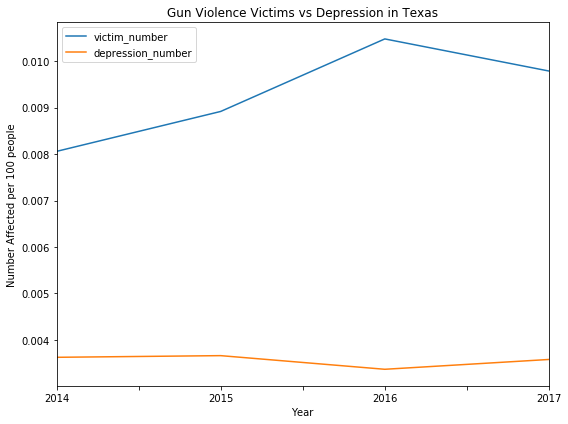

In [72]:
plt.figure()
texas.plot(figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Number Affected per 100 people')
plt.title('Gun Violence Victims vs Depression in Texas')
plt.tight_layout()
plt.show()

**Illinois Numbers**

In [40]:
illinois = pd.concat([GV_by_year[GV_by_year['state']=='Illinois'], DD_agg[DD_agg['state']=='Illinois']], axis=0)
illinois.rename(index={13:'victim_number',11:'depression_number'}, inplace=True)
illinois.drop(['state','total'],inplace = True, axis=1)
illinois = illinois.T

#normalize by population
illinois['victim_number'] = illinois['victim_number']*(100/12826895)
illinois['depression_number'] = illinois['depression_number']*(100/12826895)

<Figure size 432x288 with 0 Axes>

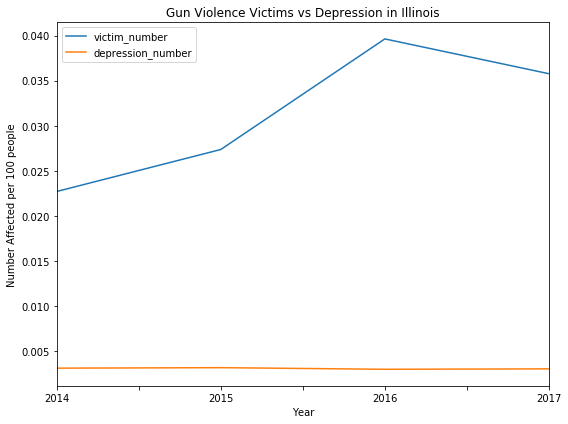

In [73]:
plt.figure()
illinois.plot(figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Number Affected per 100 people')
plt.title('Gun Violence Victims vs Depression in Illinois')
plt.tight_layout()
plt.show()

**California Numbers**

In [42]:
cali = pd.concat([GV_by_year[GV_by_year['state']=='California'], 
                  DD_agg[DD_agg['state']=='California']], axis=0).reset_index()
cali.rename(index={0:'victim_number',1:'depression_number'}, inplace=True)
cali.drop(['index','state','total'],inplace = True, axis=1)
cali = cali.T

#normalize by population
cali['victim_number'] = cali['victim_number']*(100/39209127)
cali['depression_number'] = cali['depression_number']*(100/39209127)

<Figure size 432x288 with 0 Axes>

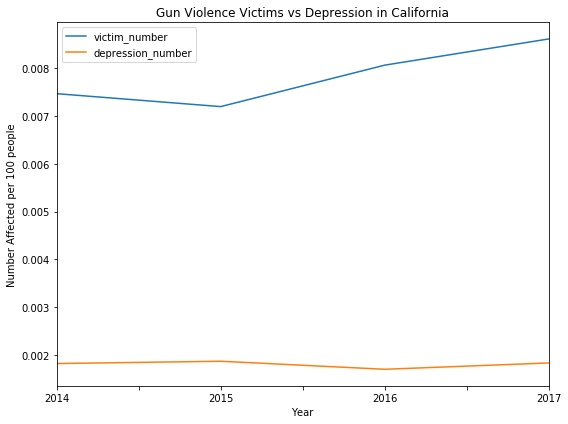

In [74]:
plt.figure()
cali.plot(figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Number Affected per 100 people')
plt.title('Gun Violence Victims vs Depression in California')
plt.tight_layout()
plt.show()

**Ohio Numbers**

In [44]:
ohio = pd.concat([GV_by_year[GV_by_year['state']=='Ohio'], 
                  DD_agg[DD_agg['state']=='Ohio']], axis=0).reset_index()
ohio.rename(index={0:'victim_number',1:'depression_number'}, inplace=True)
ohio.drop(['index','state','total'],inplace = True, axis=1)
ohio = ohio.T

#normalize by population
ohio['victim_number'] = ohio['victim_number']*(100/11635003)
ohio['depression_number'] = ohio['depression_number']*(100/11635003)

<Figure size 432x288 with 0 Axes>

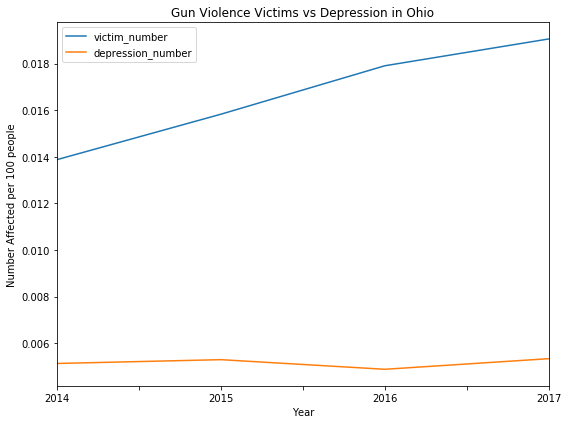

In [75]:
plt.figure()
ohio.plot(figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Number Affected per 100 people')
plt.title('Gun Violence Victims vs Depression in Ohio')
plt.tight_layout()
plt.show()